In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import gutenberg, stopwords
from collections import Counter
import nltk
import sklearn as ensemble
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

nltk.download('gutenberg')
!python -m spacy download 'en'

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/amyscott/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!



    Linking successful
    /anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
    /anaconda3/lib/python3.7/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [2]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/anaconda3/bin/python
3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)


In [3]:
from nltk.corpus import gutenberg, stopwords
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
def text_cleaner(text):
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = ' '.join(text.split())
    return text
    

poem = gutenberg.raw('blake-poems.txt')
thursday= gutenberg.raw('chesterton-thursday.txt')
bryant= gutenberg.raw('bryant-stories.txt')
burgess= gutenberg.raw('burgess-busterbrown.txt')
persuasion = gutenberg.raw('austen-persuasion.txt')
alice = gutenberg.raw('carroll-alice.txt')
brown= gutenberg.raw('chesterton-brown.txt')
paradise= gutenberg.raw('milton-paradise.txt')
whitman= gutenberg.raw('whitman-leaves.txt')
sense= gutenberg.raw('austen-sense.txt')


poem = re.sub(r'Chapter \d+', '', poem)
thursday = re.sub(r'CHAPTER .*', '', thursday)
persuasion = re.sub(r'Chapter \d+', '', persuasion)
alice = re.sub(r'Chapter \d+', '', alice)
bryant = re.sub(r'Chapter \d+', '', bryant)
brown = re.sub(r'Chapter \d+', '', brown)
paradise = re.sub(r'Chapter \d+', '', paradise)
whitman = re.sub(r'Chapter \d+', '', whitman)
sense = re.sub(r'Chapter \d+', '', sense)
burgess = re.sub(r'Chapter \d+', '', burgess)

    
poem = text_cleaner(poem[:int(len(poem)/30)])
thursday = text_cleaner(thursday[:int(len(thursday)/30)])
alice = text_cleaner(alice[:int(len(alice)/30)])
persuasion = text_cleaner(persuasion[:int(len(persuasion)/30)])
bryant = text_cleaner(bryant[:int(len(bryant)/30)])
brown = text_cleaner(brown[:int(len(brown)/30)])
paradise = text_cleaner(paradise[:int(len(paradise)/30)])
whitman = text_cleaner(whitman[:int(len(whitman)/30)])
sense = text_cleaner(sense[:int(len(sense)/30)])
burgess = text_cleaner(burgess[:int(len(burgess)/30)])

In [5]:
import spacy
nlp = spacy.load('en')
nlp.max_length

poem_doc = nlp(poem)
thursday_doc = nlp(thursday)
persuasion_doc = nlp(persuasion)
alice_doc = nlp(alice)
bryant_doc = nlp(bryant)
brown_doc = nlp(brown)
paradise_doc = nlp(paradise)
whitman_doc= nlp(whitman)
sense_doc = nlp(sense)
burgess_doc = nlp(burgess)


In [6]:
poem_sents = [[sent, "Blake"] for sent in poem_doc.sents]
thursday_sents = [[sent, "Chesterton"] for sent in thursday_doc.sents]
alice_sents = [[sent, "Carroll"] for sent in alice_doc.sents]
persuasion_sents = [[sent, "Austen"] for sent in persuasion_doc.sents]
bryant_sents = [[sent, "Bryant"] for sent in bryant_doc.sents]
brown_sents = [[sent, "Chesterton-Brown"] for sent in brown_doc.sents]
paradise_sents = [[sent, "Milton"] for sent in paradise_doc.sents]
whitman_sents = [[sent, "Whitman"] for sent in whitman_doc.sents]
sense_sents = [[sent, "Austen-Sense"] for sent in sense_doc.sents]
burgess_sents = [[sent, "Burgess"] for sent in burgess_doc.sents]

# Combine the sentences from the two novels into one data frame.
sentences = pd.DataFrame(alice_sents + persuasion_sents + poem_sents + thursday_sents + bryant_sents + brown_sents 
                        + paradise_sents +  whitman_sents + sense_sents + burgess_sents)
sentences.head()

,0,1
0,"(CHAPTER, I.)",Carroll
1,"(Down, the, Rabbit, -, Hole, Alice, was, begin...",Carroll
2,"(So, she, was, considering, in, her, own, mind...",Carroll
3,"(There, was, nothing, so, VERY, remarkable, in...",Carroll
4,"(Oh, dear, !)",Carroll


In [7]:
def bag_of_words(text):
    
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    return [item[0] for item in Counter(allwords).most_common(1000)]
    

def bow_features(sentences, common_words):
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['text_source'] = sentences[1]
    df.loc[:, common_words] = 0

    
    

    

    for i, sentence in enumerate(df['text_sentence']):
        
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        for word in words:
            df.loc[i, word] += 1
        
        if i % 50 == 0:
            print("Processing row {}".format(i))
            
    return df


poemwords = bag_of_words(poem_doc)
thursdaywords = bag_of_words(thursday_doc)
persuasionwords = bag_of_words(persuasion_doc)
alicewords = bag_of_words(alice_doc)
bryantwords = bag_of_words(bryant_doc)
brownwords = bag_of_words(brown_doc)
brownwords = bag_of_words(paradise_doc)
whitmanwords= bag_of_words(whitman_doc)
sensewords = bag_of_words(sense_doc)
burgesswords = bag_of_words(burgess_doc)



common_words = set(poemwords + thursdaywords + persuasionwords + alicewords + bryantwords  + 
                   brownwords + brownwords + whitmanwords + sensewords + burgesswords )

In [8]:
word_counts = bow_features(sentences, common_words)
word_counts.head()

Processing row 0
Processing row 50
Processing row 100
Processing row 150
Processing row 200
Processing row 250
Processing row 300
Processing row 350
Processing row 400
Processing row 450
Processing row 500
Processing row 550
Processing row 600
Processing row 650
Processing row 700
Processing row 750
Processing row 800
Processing row 850
Processing row 900
Processing row 950


,poet,ripe,sammy,heavenly,case,dwelling,dozi,return,prudent,by,...,feather,strain,trifle,sort,indifference,inland,midst,foible,text_sentence,text_source
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(CHAPTER, I.)",Carroll
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(Down, the, Rabbit, -, Hole, Alice, was, begin...",Carroll
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(So, she, was, considering, in, her, own, mind...",Carroll
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(There, was, nothing, so, VERY, remarkable, in...",Carroll
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(Oh, dear, !)",Carroll


In [9]:

print (word_counts.iloc[:,:-2])

    poet ripe sammy heavenly case dwelling dozi return prudent by  ...  \
0      0    0     0        0    0        0    0      0       0  0  ...   
1      0    0     0        0    0        0    0      0       0  0  ...   
2      0    0     0        0    0        0    0      0       0  0  ...   
3      0    0     0        0    0        0    0      0       0  0  ...   
4      0    0     0        0    0        0    0      0       0  0  ...   
5      0    0     0        0    0        0    0      0       0  0  ...   
6      0    0     0        0    0        0    0      0       0  0  ...   
7      0    0     0        0    0        0    0      0       0  0  ...   
8      0    0     0        0    0        0    0      0       0  0  ...   
9      0    0     0        0    0        0    0      0       0  0  ...   
10     0    0     0        0    0        0    0      0       0  0  ...   
11     0    0     0        0    0        0    0      0       0  0  ...   
12     0    0     0        0    0     

In [10]:
X = word_counts.iloc[:,:-2]
y = word_counts.iloc[:,:-2]

y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X)


In [11]:
print (y_pred)

[1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1
 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1
 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1
 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1
 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1
 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 0 0 1 1 1 1 

In [12]:
#cluster based on authors and are there certain authors using common words or not? bar graph? potentially try pca too

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np


In [14]:
pd.Series(word_counts)

ValueError: Wrong number of items passed 3050, placement implies 959

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
i= word_counts.append(y_pred)

TypeError: cannot concatenate object of type "<class 'numpy.ndarray'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [37]:
print(type(word_counts))
print(type(y_pred))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [31]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


TypeError: '(slice(None, None, None), 0)' is an invalid key

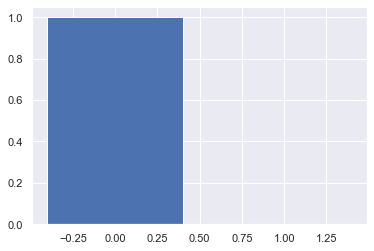

In [33]:
plt.bar(X[:, 0], X[:, 1])
plt.show()

In [13]:
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(word_counts.iloc[:,:-2], 2)
kmeans = pd.DataFrame(clust_labels)
word_counts.insert((word_counts.shape[1]),'kmeans',kmeans)
print(kmeans)

     0
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
10   0
11   0
12   0
13   0
14   0
15   1
16   0
17   0
18   0
19   1
20   0
21   0
22   0
23   0
24   1
25   0
26   0
27   1
28   0
29   0
..  ..
929  0
930  0
931  0
932  0
933  0
934  0
935  0
936  0
937  0
938  0
939  0
940  0
941  0
942  0
943  0
944  0
945  0
946  0
947  0
948  0
949  0
950  0
951  0
952  0
953  0
954  0
955  0
956  0
957  0
958  0

[959 rows x 1 columns]


In [14]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0        5    0
1      353  601


In [13]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

rfc = ensemble.RandomForestClassifier()
Y = word_counts['text_source']
X = np.array(word_counts.drop(['text_sentence','text_source'], 1))

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=0)
train = rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training set score: 0.9707927677329624

Test set score: 0.45


In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2') 
train = lr.fit(X_train, y_train)
print(X_train.shape, y_train.shape)
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

(719, 3048) (719,)
Training set score: 0.9694019471488178

Test set score: 0.625


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
